# Census Data 11 - Edem Kwesi Dziko

In [1]:
# Import required Python libraries for the task

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ydata_profiling as pp
from ydata_profiling import ProfileReport

In [2]:
# retrieves the list of files in the directory
#ls

# Data Cleaning Part 1 
## Detecting and filling out all white spaces within the dataframe

In [3]:
#Read the census data to using pandas csv reader

data = pd.read_csv('census11.csv')
data.head(2)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Regentchain Avenue,Ashleigh,Dale,41,Head,Divorced,Female,Field trials officer,None,Catholic
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,NaN,Female,Student,None,NaN


In [4]:
# get an overview of the data using ydata profiling

data1 = ProfileReport(data, title = 'Overview of Census Data')
data1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
#Checking the data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8377 non-null   int64 
 1   Street                         8377 non-null   object
 2   First Name                     8377 non-null   object
 3   Surname                        8377 non-null   object
 4   Age                            8377 non-null   object
 5   Relationship to Head of House  8377 non-null   object
 6   Marital Status                 6402 non-null   object
 7   Gender                         8377 non-null   object
 8   Occupation                     8377 non-null   object
 9   Infirmity                      8377 non-null   object
 10  Religion                       6365 non-null   object
dtypes: int64(1), object(10)
memory usage: 720.0+ KB


In [6]:
#Check through the dataset to identify columns with whitespaces

data_a = data == " "
data_a.sum()

House Number                      0
Street                            0
First Name                        1
Surname                           2
Age                               1
Relationship to Head of House     0
Marital Status                    1
Gender                            3
Occupation                        1
Infirmity                        13
Religion                          2
dtype: int64

##### Checking for rows with whitespaces in First Name column

In [7]:
# Seaching through the First Name column to find whitespaces

empty_firstname = data[data['First Name'] == " "]
empty_firstname

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1497,4,Power Keys,,Frost,88,Head,Widowed,Male,Retired Civil Service fast streamer,None,Methodist


In [8]:
#House search for Frost to find out more from his household inorder to determine his firstname

hse_search_0 = data[(data['House Number'] == 4) & (data['Street'] == 'Power Keys')]  
hse_search_0

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1497,4,Power Keys,,Frost,88,Head,Widowed,Male,Retired Civil Service fast streamer,None,Methodist


In [9]:
# since it is impossible to determine the first name of someone, the whitespace will be changed to 'Unknown'
data.loc[1497, 'First Name'] = 'Unknown'

##### Checking for rows with whitespaces in Surname column

In [10]:
# Seaching through the Surname column to find whitespaces

empty_surname = data[data['Surname'] == " "]
empty_surname

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
60,8,Telegraphnet Street,Linda,,41,Daughter,Single,Female,Commercial art gallery manager,None,Christian
4236,48,Chan Estate,Denise,,9,Adopted Daughter,NaN,Female,Student,None,NaN


In [11]:
# filtering through a household to identify what Linda's surname could be

hse_search_1 = data[(data['House Number'] == 8) & (data['Street'] == 'Telegraphnet Street')]  
hse_search_1

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
57,8,Telegraphnet Street,Elaine,Patel,78,Head,Divorced,Female,Retired Clinical biochemist,None,Christian
58,8,Telegraphnet Street,Kate,Patel,44,Daughter,Single,Female,Translator,None,Christian
59,8,Telegraphnet Street,Damien,Patel,42,Son,Single,Male,Tourist information centre manager,None,Christian
60,8,Telegraphnet Street,Linda,,41,Daughter,Single,Female,Commercial art gallery manager,None,Christian
61,8,Telegraphnet Street,Patricia,Patel,38,Daughter,Divorced,Female,Psychiatrist,None,Christian


In [12]:
# Since Linda is the a biological child, her Surname will be changed to Patel
data.loc[60, 'Surname'] = 'Patel'

In [13]:
# filtering through a household to identify what Denise's surname could be

hse_search_2 = data[(data['House Number'] == 48) & (data['Street'] == 'Chan Estate')] 
hse_search_2

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4232,48,Chan Estate,Francesca,Lloyd,37,Head,Married,Female,Drilling engineer,None,Catholic
4233,48,Chan Estate,Shane,Lloyd,41,Husband,Married,Male,Banker,None,Catholic
4234,48,Chan Estate,Alexandra,Lloyd,13,Daughter,NaN,Female,Student,None,NaN
4235,48,Chan Estate,Arthur,Lloyd,12,Son,NaN,Male,Student,None,NaN
4236,48,Chan Estate,Denise,,9,Adopted Daughter,NaN,Female,Student,None,NaN


In [14]:
# It is difficult to determine the surname of Denise since she's an adopted child hence her surname will be 'unknown'

data.loc[4236, 'Surname'] = 'Unknown'

##### Checking for rows with whitespaces in Age column

In [15]:
# Checking for whitespaces within the Age column

empty_age = data[data['Age'] == " "]
empty_age

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4000,6,Pendragon Lane,Howard,Baker,,Son,Single,Male,University Student,None,Methodist


In [16]:
# filtering through a household to estimate what Howard's age could be

hse_search_3 = data[(data['House Number'] == 6) & (data['Street'] == 'Pendragon Lane')] 
hse_search_3

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3999,6,Pendragon Lane,Zoe,Baker,43,Head,Single,Female,Field trials officer,None,Methodist
4000,6,Pendragon Lane,Howard,Baker,,Son,Single,Male,University Student,None,Methodist
4001,6,Pendragon Lane,Vanessa,Baker,19,Daughter,Single,Female,University Student,None,Methodist
4002,6,Pendragon Lane,Leslie,Baker,19,Son,Single,Male,University Student,None,Methodist
4447,6,Pendragon Lane,Jenna,Hughes,60,Head,Divorced,Female,Forest/woodland manager,None,Catholic


In [17]:
# Here I'm assuming that the two female children are twins and since Howard comes top of the list of children, 
# he's the eldest child. Again, since they are all University Students, I assume that Howard would be 21 years
# (thus, with the idea of 2years family planning between children)

data.loc[4000, 'Age'] = '21'

##### Checking for rows with whitespaces in the Marital Status column

In [18]:
# Checking for whitespaces within the Marital Status column

empty_marr_stat = data[data['Marital Status'] == " "]
empty_marr_stat

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4230,47,Chan Estate,Norman,Ward,25,Son,,Male,Administrator,None,None


In [19]:
# filtering through a household to analyse the family's marital status


hse_search_4 = data[(data['House Number'] == 47) & (data['Street'] == 'Chan Estate')] # filtering through a household to analyse the family's marital status
hse_search_4

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4228,47,Chan Estate,Jemma,Ward,41,Head,Married,Female,Unemployed,None,Christian
4229,47,Chan Estate,Maurice,Ward,44,Husband,Married,Male,Unemployed,None,Christian
4230,47,Chan Estate,Norman,Ward,25,Son,,Male,Administrator,None,None
4231,47,Chan Estate,Ronald,Ward,12,Son,NaN,Male,Student,None,NaN


In [20]:
# Since Norman, an adult, is still leaving under his parent's house, I assumed that he is single 
# and hence the white space was corrected with 'Single'

data.loc[4230, 'Marital Status'] = 'Single'


##### Checking for rows with whitespaces in the Gender column

In [21]:
# Checking for whitespaces within the Gender column

empty_gend = data[data['Gender'] == " "] 
empty_gend

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1002,1,Taylor Grove,Pamela,Edwards,69,Head,Married,,"Retired Engineer, technical sales",None,Christian
6899,8,Tiger Avenue,Leanne,Gill,22,None,Single,,University Student,None,None
7348,25,Canterbury Well,Irene,Harvey,51,Head,Married,,"Librarian, public",None,Christian


In [22]:
# By their first names I could tell that Pamela, Leanne and Irene are all Females hence I replaced the white 
# spaces with Female

data.loc[(1002,6899,7348), 'Gender'] = 'Female'

##### Checking for rows with whitespaces in the Occupation column

In [23]:
# Checking for whitespaces within the Occupation column

empty_occup = data[data['Occupation'] == " "] 
empty_occup

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3399,194,Harvey Road,Josephine,Anderson,73,Head,Divorced,Female,,None,Christian


In [24]:
# By this, Howard is passed the pension age hence he should be retired now eventhough he could be doing 
# his own private work, I replaced the white space with ' Retired, Unknown'

data.loc[3399, 'Occupation'] = 'Retired Unknown'

##### Checking for rows with whitespaces in the Infirmity column

In [25]:
# Checking for rows with whitespaces in the Infirmity column

empty_infirm = data[data['Infirmity'] == " "]
empty_infirm

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
102,2,Smith Port,Reece,Knight,28,Head,Married,Male,Garment/textile technologist,,None
258,106,Smith Port,Raymond,Brookes,27,Head,Divorced,Male,"Programmer, multimedia",,None
1593,26,Brady Creek,Adam,Hewitt,64,Husband,Married,Male,Unemployed,,None
4053,20,Pendragon Lane,Diane,Rees,9,Granddaughter,NaN,Female,Student,,NaN
5554,12,Manor Flats,Garry,Williamson,46,Head,Single,Male,Local government officer,,Christian
5637,60,Manor Flats,Vincent,Walker,43,Husband,Married,Male,Equality and diversity officer,,None
5730,2,Hewitt Avenue,Teresa,Jones,7,Daughter,NaN,Female,Student,,NaN
5802,3,CherryChestnut Spurs,Victor,Fletcher,16,Son,NaN,Male,Student,,NaN
5807,5,CherryChestnut Spurs,Valerie,Dixon,5,Daughter,NaN,Female,Student,,NaN
6681,65,ExcaliburBellsby Drive,Hannah,Charlton,63,None,Single,Female,Tree surgeon,,None


In [26]:
# It would be dangerous to underestimate empty infirmity values hence, its prudent to tag these 13 people with an 
# unknown infirmity
data.loc[empty_infirm.index, 'Infirmity'] = 'Unknown'

##### Checking for rows with whitespaces in the Religion column

In [27]:
# Checking for rows with whitespaces in the Religion column

empty_relig = data[data['Religion'] == " "]  
empty_relig

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4288,12,Jones Ramp,Jane,Armstrong,46,Wife,Married,Female,Garment/textile technologist,None,
7487,58,Canterbury Well,Christopher,Cole,15,Son,NaN,Male,Student,None,


In [28]:
# filtering through a household to analyse the Religion of Jane

hse_search_5 = data[(data['House Number'] == 12) & (data['Street'] == 'Jones Ramp')] # filtering through a household to analyse the family's religion
hse_search_5

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4287,12,Jones Ramp,Sam,Armstrong,49,Head,Married,Male,"Accountant, chartered certified",None,Catholic
4288,12,Jones Ramp,Jane,Armstrong,46,Wife,Married,Female,Garment/textile technologist,None,


In [29]:
# Since Jane lives with his husband who's a catholic, its very possible she's also a catholic

data.loc[4288, 'Religion'] = 'Catholic'

In [30]:
# filtering through a household to analyse the Religion of Christopher

hse_search_6 = data[(data['House Number'] == 58) & (data['Street'] == 'Canterbury Well')]
hse_search_6

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7482,58,Canterbury Well,Daniel,Cole,62,Head,Single,Male,Water quality scientist,None,Methodist
7483,58,Canterbury Well,Linda,Wallace,59,Partner,Single,Female,"Buyer, retail",None,Methodist
7484,58,Canterbury Well,Donna,Cole,25,Daughter,Single,Female,Maintenance engineer,None,None
7485,58,Canterbury Well,Deborah,Cole,21,Daughter,Single,Female,University Student,None,Methodist
7486,58,Canterbury Well,Gerard,Cole,19,Son,Single,Male,University Student,None,None
7487,58,Canterbury Well,Christopher,Cole,15,Son,NaN,Male,Student,None,


In [31]:
# Because Christopher is a minor, his religion status was converted to 'Undecided' due to UK regulation on Religion for minors

data.loc[7487, 'Religion'] = 'Undecided'

In [32]:
#Checking the whitespaces of the data after all corrections have been made

data_a = data == " "
data_a.sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

# Data Cleaning Part 2 
## Checking, analysing and correcting the Marital Status column Null contents

In [33]:
# check the number of null values within the dataset per column

data.isna().sum()      #or data.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1975
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2012
dtype: int64

In [34]:
# Printing out all null values within the Marital Status column

mari_stat_issues = data[data['Marital Status'].isnull()]
mari_stat_issues

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,NaN,Female,Student,None,NaN
2,1,Regentchain Avenue,Gary,Dale,7,Son,NaN,Male,Student,None,NaN
6,2,Regentchain Avenue,Mandy,Grant,17,Daughter,NaN,Female,Student,None,NaN
7,2,Regentchain Avenue,Amanda,Grant,11,Daughter,NaN,Female,Student,None,NaN
14,4,Regentchain Avenue,Sandra,Price,4,Daughter,NaN,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8352,1,Oyster Manorhouse,Howard,Goodwin,17,Son,NaN,Male,Student,None,NaN
8369,1,Howard House,Tom,Bryant,13,Son,NaN,Male,Student,None,NaN
8370,1,Howard House,Jean,Bryant,8,Daughter,NaN,Female,Student,None,NaN
8371,1,Howard House,Abbie,Bryant,4,Daughter,NaN,Female,Child,None,NaN


In [35]:
# Checking all the unique values within the Age column

data['Age'].unique()

array(['41', '11', '7', '40', '35', '19', '17', '60', '62', '30', '42',
       '46', '4', '78', '81', '43', '44', '24', '57', '53', '32', '12',
       '9', '85', '58', '59', '26', '90', '97', '63', '18', '15', '10',
       '47', '16', '13', '36', '6', '2', '1', '25', '56', '38', '21',
       '31', '74', '67', '65', '71', '79', '45', '61', '72', '54', '33',
       '34', '23', '28', '29', '91', '64', '80', '76', '49', '73', '50',
       '84', '75', '48', '14', '51', '22', '66', '20', '77', '0', '27',
       '86', '68', '5', '83', '55', '69', '70', '39', '82', '88', '37',
       '52', '8', '3', '87', '105', '95', '96', '89', '92', '93', '99',
       '101', '98', '116', '112', '94', '59.782817341882584', '9.0',
       '102', '103', '100', '104', '106', '59.841399743989754',
       '63.841399743989754', '107', '75.27548655560247',
       '21.999999999999993', '17.999999999999993'], dtype=object)

In [36]:
# Converting all values within the Age column into Integers

data['Age'] = data['Age'].astype(float)
data['Age'] = round(data['Age'],0)
data['Age'] = data['Age'].astype(int)
print(data['Age'].dtype)

int32


In [37]:
# Printing unique values within the ahe column after the correction 

data['Age'].unique()

array([ 41,  11,   7,  40,  35,  19,  17,  60,  62,  30,  42,  46,   4,
        78,  81,  43,  44,  24,  57,  53,  32,  12,   9,  85,  58,  59,
        26,  90,  97,  63,  18,  15,  10,  47,  16,  13,  36,   6,   2,
         1,  25,  56,  38,  21,  31,  74,  67,  65,  71,  79,  45,  61,
        72,  54,  33,  34,  23,  28,  29,  91,  64,  80,  76,  49,  73,
        50,  84,  75,  48,  14,  51,  22,  66,  20,  77,   0,  27,  86,
        68,   5,  83,  55,  69,  70,  39,  82,  88,  37,  52,   8,   3,
        87, 105,  95,  96,  89,  92,  93,  99, 101,  98, 116, 112,  94,
       102, 103, 100, 104, 106, 107])

In [38]:
# filter the data based on marital status and age to find children

mari_stat_issues_children = data[(data['Marital Status'].isnull()) & (data['Age'] < 18)]
mari_stat_issues_children


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,NaN,Female,Student,None,NaN
2,1,Regentchain Avenue,Gary,Dale,7,Son,NaN,Male,Student,None,NaN
6,2,Regentchain Avenue,Mandy,Grant,17,Daughter,NaN,Female,Student,None,NaN
7,2,Regentchain Avenue,Amanda,Grant,11,Daughter,NaN,Female,Student,None,NaN
14,4,Regentchain Avenue,Sandra,Price,4,Daughter,NaN,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8352,1,Oyster Manorhouse,Howard,Goodwin,17,Son,NaN,Male,Student,None,NaN
8369,1,Howard House,Tom,Bryant,13,Son,NaN,Male,Student,None,NaN
8370,1,Howard House,Jean,Bryant,8,Daughter,NaN,Female,Student,None,NaN
8371,1,Howard House,Abbie,Bryant,4,Daughter,NaN,Female,Child,None,NaN


In [39]:
# All 1974 entries involving children would be converted to 'Single-minors'
data.loc[mari_stat_issues_children.index, 'Marital Status'] = 'Single-minors'


In [40]:
# filter the data based on marital status being null and age to find adults

mari_stat_issues_adults = data[(data['Marital Status'].isnull()) & (data['Age'] > 17)]
mari_stat_issues_adults 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7643,12,Aethelred Heights,Ruth,Wood,18,Daughter,NaN,Female,Student,None,NaN


In [41]:
 # filtering through a household to understand the marital status for Ruth

hse_search_7 = data[(data['House Number'] == 12) & (data['Street'] == 'Aethelred Heights')]
hse_search_7

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7641,12,Aethelred Heights,Louise,Wood,75,Head,Single,Female,Retired Sales promotion account executive,None,None
7642,12,Aethelred Heights,Toby,Wood,22,Son,Divorced,Male,University Student,None,None
7643,12,Aethelred Heights,Ruth,Wood,18,Daughter,NaN,Female,Student,None,NaN


In [42]:
# since Ruth is not married, her Marital Status would be changed to 'Single'
data.loc[7643, 'Marital Status'] = 'Single'

# Data Cleaning Part 3 
## Checking, analysing and correcting the Religion column Null contents

In [43]:
# check the number of null values within the Religion column

data['Religion'].isnull().sum()

2012

In [44]:
# counts the unique values in the Religion column

data['Religion'].value_counts()

None           2840
Christian      1956
Catholic        886
Methodist       499
Muslim           97
Sikh             40
Jewish           36
Buddist           3
Jedi              2
Quaker            1
Housekeeper       1
Pagan             1
Private           1
Orthodoxy         1
Undecided         1
Name: Religion, dtype: int64

In [45]:
# filter the data based on Religion being null and age to find children

empt_religion_children = data[(data['Religion'].isnull()) & (data['Age'] < 18)]
empt_religion_children

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,Single-minors,Female,Student,None,NaN
2,1,Regentchain Avenue,Gary,Dale,7,Son,Single-minors,Male,Student,None,NaN
6,2,Regentchain Avenue,Mandy,Grant,17,Daughter,Single-minors,Female,Student,None,NaN
7,2,Regentchain Avenue,Amanda,Grant,11,Daughter,Single-minors,Female,Student,None,NaN
14,4,Regentchain Avenue,Sandra,Price,4,Daughter,Single-minors,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8352,1,Oyster Manorhouse,Howard,Goodwin,17,Son,Single-minors,Male,Student,None,NaN
8369,1,Howard House,Tom,Bryant,13,Son,Single-minors,Male,Student,None,NaN
8370,1,Howard House,Jean,Bryant,8,Daughter,Single-minors,Female,Student,None,NaN
8371,1,Howard House,Abbie,Bryant,4,Daughter,Single-minors,Female,Child,None,NaN


In [46]:
#Checking the unique values in minors with null religions

uniq_rel_children = empt_religion_children['Religion'].unique()
uniq_rel_children

array([nan], dtype=object)

In [47]:
# Due to UK regulation on the need for children to decide on their own which religion is best for them, 
# I converted thes null values to 'Undecided

data.loc[empt_religion_children.index, 'Religion'] = 'Undecided'

In [48]:
# filter the data based on Religion being null and age to find adults

empt_religion_adults = data[(data['Religion'].isnull()) & (data['Age'] > 17)]
empt_religion_adults

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
165,41,Smith Port,Carole,Thomas,18,Head,Single,Female,Student,None,NaN
215,77,Smith Port,Thomas,Turner,18,Head,Divorced,Male,Student,None,NaN
359,175,Smith Port,Clare,Atkinson,18,None,Single,Female,Student,None,NaN
489,48,Trent Crescent,Gerald,Clark,18,Head,Single,Male,Student,None,NaN
853,63,Cambridge Street,Gavin,Talbot,18,Head,Single,Male,Student,None,NaN
914,80,Cambridge Street,Carl,Price,18,None,Widowed,Male,Student,None,NaN
931,86,Cambridge Street,Patrick,Khan,18,None,Single,Male,Student,None,NaN
960,94,Cambridge Street,Mark,McDonald,18,Head,Single,Male,Student,None,NaN
1927,2,Cooper Track,Wayne,Clark,18,Head,Single,Male,Student,None,NaN
2062,22,Pickering Summit,Adrian,Kelly,18,Head,Single,Male,Student,None,NaN


In [49]:
# retrieving a list of religion for Students and University Students & PhD Students
students_religion = data[(data['Occupation'] == 'Student') | (data['Occupation'] == 'University Student') | (data['Occupation'] == 'Phd Student')] 
students_religion

# retrieving the count of unique values for Students religion
students_religion['Religion'].value_counts()

Undecided    1504
None          303
Christian     135
Catholic       69
Methodist      45
Muslim         13
Sikh            7
Jewish          4
Buddist         2
Private         1
Name: Religion, dtype: int64

In [50]:
#findng the mode religions of students to fill up the null values for adults

data.loc[empt_religion_adults.index, 'Religion'] = 'None'

In [51]:
data.isna().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

# Data Cleaning Part 4 
## Checking, analysing the data integrity as per the set out rules and procedures

In [52]:
# shows the statistical summary of the dataset

data.describe()

,House Number,Age
count,8377.000000,8377.000000
mean,31.171899,36.306315
std,34.238831,21.781536
min,1.000000,0.000000
25%,9.000000,19.000000
50%,20.000000,36.000000
75%,40.000000,51.000000
max,197.000000,116.000000


In [53]:
#Displays the general information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8377 non-null   int64 
 1   Street                         8377 non-null   object
 2   First Name                     8377 non-null   object
 3   Surname                        8377 non-null   object
 4   Age                            8377 non-null   int32 
 5   Relationship to Head of House  8377 non-null   object
 6   Marital Status                 8377 non-null   object
 7   Gender                         8377 non-null   object
 8   Occupation                     8377 non-null   object
 9   Infirmity                      8377 non-null   object
 10  Religion                       8377 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 687.3+ KB


In [54]:
# Checking the make up of the marital status column

marital_stat = data['Marital Status'].unique() 
marital_stat

array(['Divorced', 'Single-minors', 'Married', 'Single', 'Widowed'],
      dtype=object)

In [55]:
# Checking the make up of the age column

age_check = data['Age'].unique()
age_check

array([ 41,  11,   7,  40,  35,  19,  17,  60,  62,  30,  42,  46,   4,
        78,  81,  43,  44,  24,  57,  53,  32,  12,   9,  85,  58,  59,
        26,  90,  97,  63,  18,  15,  10,  47,  16,  13,  36,   6,   2,
         1,  25,  56,  38,  21,  31,  74,  67,  65,  71,  79,  45,  61,
        72,  54,  33,  34,  23,  28,  29,  91,  64,  80,  76,  49,  73,
        50,  84,  75,  48,  14,  51,  22,  66,  20,  77,   0,  27,  86,
        68,   5,  83,  55,  69,  70,  39,  82,  88,  37,  52,   8,   3,
        87, 105,  95,  96,  89,  92,  93,  99, 101,  98, 116, 112,  94,
       102, 103, 100, 104, 106, 107])

In [56]:
data['Age'].describe() #checking the statistical details of the age column 

count    8377.000000
mean       36.306315
std        21.781536
min         0.000000
25%        19.000000
50%        36.000000
75%        51.000000
max       116.000000
Name: Age, dtype: float64

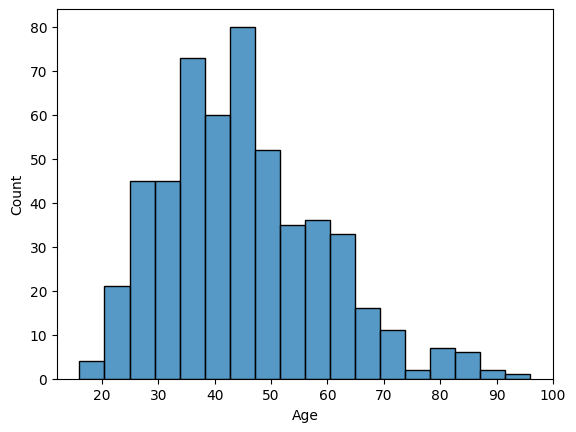

In [57]:
# plotting an unemployed graph for the data
unemployed_ = sns.histplot(data = data[data['Occupation'] == 'Unemployed'], x ='Age')

In [58]:
# filtering to see unemplyed people aged over 65

possible_retirees = data[(data['Occupation']=='Unemployed')  & (data['Age'] >= 66)]
possible_retirees

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
129,18,Smith Port,Kenneth,Atkinson,80,Head,Widowed,Male,Unemployed,None,Christian
286,123,Smith Port,Marc,Robson,67,Husband,Married,Male,Unemployed,None,Catholic
424,22,Trent Crescent,Danielle,Lynch,83,Head,Single,Female,Unemployed,None,Christian
1011,7,Taylor Grove,Andrea,Short,87,Head,Widowed,Female,Unemployed,None,Christian
1105,15,Ward Avenue,Barbara,Hill,67,Head,Widowed,Female,Unemployed,None,None
1281,42,Wharf Track,Robin,George,82,Head,Divorced,Male,Unemployed,None,Christian
1306,2,Wales Locks,Kate,Bell,72,Head,Divorced,Female,Unemployed,None,None
1631,41,Brady Creek,Karl,Steele,72,Head,Divorced,Male,Unemployed,None,Christian
1973,29,Cooper Track,Joyce,Marshall,81,Head,Widowed,Female,Unemployed,None,Christian
2130,51,Pickering Summit,Gillian,Wong,66,Head,Widowed,Female,Unemployed,None,Christian


In [59]:
# Using the current pension age of 66 years, all those 66 and over years old who show as unemployed are 
# changed as 'Retired Unknown'

data.loc[possible_retirees.index, 'Occupation'] = 'Retired Unknown'

In [60]:
# Checking the make up of the gender column

gender_check = data['Gender'].unique()
gender_check

array(['Female', 'Male'], dtype=object)

In [61]:
# Checking the make up of the occupation column

occup_check = data['Occupation'].unique()
occup_check

array(['Field trials officer', 'Student',
       'Environmental education officer', ...,
       'Retired Building services engineer', 'Retired Legal executive',
       'Retired Counsellor'], dtype=object)

In [62]:
# Checking the make up of the infirmity column

infirm_check = data['Infirmity'].unique()
infirm_check

array(['None', 'Blind', 'Unknown', 'Physical Disability',
       'Mental Disability', 'Deaf', 'Unknown Infection', 'Disabled'],
      dtype=object)

In [63]:
# Checking the make up of the Marital status column
data['Marital Status'].unique()

array(['Divorced', 'Single-minors', 'Married', 'Single', 'Widowed'],
      dtype=object)

In [64]:
# shows all minors who dont have NaN values 

minor_marital_checker = data[(data['Marital Status'].notnull()) & (data['Age'] < 18)]
minor_marital_checker

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Regentchain Avenue,Deborah,Dale,11,Daughter,Single-minors,Female,Student,None,Undecided
2,1,Regentchain Avenue,Gary,Dale,7,Son,Single-minors,Male,Student,None,Undecided
6,2,Regentchain Avenue,Mandy,Grant,17,Daughter,Single-minors,Female,Student,None,Undecided
7,2,Regentchain Avenue,Amanda,Grant,11,Daughter,Single-minors,Female,Student,None,Undecided
14,4,Regentchain Avenue,Sandra,Price,4,Daughter,Single-minors,Female,Child,None,Undecided
...,...,...,...,...,...,...,...,...,...,...,...
8352,1,Oyster Manorhouse,Howard,Goodwin,17,Son,Single-minors,Male,Student,None,Undecided
8369,1,Howard House,Tom,Bryant,13,Son,Single-minors,Male,Student,None,Undecided
8370,1,Howard House,Jean,Bryant,8,Daughter,Single-minors,Female,Student,None,Undecided
8371,1,Howard House,Abbie,Bryant,4,Daughter,Single-minors,Female,Child,None,Undecided


###### Relationship to Head of House

In [65]:
data['Relationship to Head of House'].unique()

array(['Head', 'Daughter', 'Son', 'Wife', 'Husband', 'None', 'Partner',
       'Lodger', 'Grandson', 'Granddaughter', 'Sibling', 'Visitor',
       'Cousin', 'Adopted Daughter', 'Nephew', 'Neice', 'Adopted Son',
       'Step-Son', 'Step-Daughter', 'Adopted Granddaughter'], dtype=object)

In [66]:
# Checking the relationship of those labelled 'None' in the relationship to head of house
data[(data['Relationship to Head of House'] == 'None')].head(50)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
19,6,Regentchain Avenue,Bethan,Stevenson,24,None,Single,Female,Contracting civil engineer,None,None
20,6,Regentchain Avenue,Douglas,Austin,30,None,Single,Male,"Surveyor, building",None,None
21,6,Regentchain Avenue,Brian,Miles,57,None,Divorced,Male,"Editor, film/video",None,Christian
22,6,Regentchain Avenue,Leigh,Johnson,53,None,Single,Male,Hospital doctor,None,Christian
23,6,Regentchain Avenue,Jodie,Elliott,43,None,Single,Female,"Engineer, civil (consulting)",None,None
24,6,Regentchain Avenue,Donald,Cooper,19,None,Single,Male,University Student,None,Catholic
54,7,Telegraphnet Street,Garry,Morton,32,None,Single,Male,"Therapist, sports",None,None
55,7,Telegraphnet Street,Sandra,Hooper,56,None,Single,Female,Health promotion specialist,None,None
56,7,Telegraphnet Street,Kate,Thompson,59,None,Single,Female,"Nurse, mental health",None,Christian
65,10,Telegraphnet Street,Duncan,Thompson,31,None,Single,Male,PhD Student,None,None


In [67]:
possible_tenants = data[(data['Relationship to Head of House'] == 'None')]
possible_tenants

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
19,6,Regentchain Avenue,Bethan,Stevenson,24,None,Single,Female,Contracting civil engineer,None,None
20,6,Regentchain Avenue,Douglas,Austin,30,None,Single,Male,"Surveyor, building",None,None
21,6,Regentchain Avenue,Brian,Miles,57,None,Divorced,Male,"Editor, film/video",None,Christian
22,6,Regentchain Avenue,Leigh,Johnson,53,None,Single,Male,Hospital doctor,None,Christian
23,6,Regentchain Avenue,Jodie,Elliott,43,None,Single,Female,"Engineer, civil (consulting)",None,None
...,...,...,...,...,...,...,...,...,...,...,...
8345,1,Parrot Hall,Mohammad,Foster,24,None,Single,Male,"Surveyor, building",None,None
8346,1,Parrot Hall,Bethan,Dale,35,None,Single,Female,Politician's assistant,None,Catholic
8359,1,Hutchinson House,Stacey,Woodward,43,None,Single,Female,Secretary/administrator,None,Christian
8360,1,Hutchinson House,Ashley,Morgan,33,None,Single,Male,"Horticulturist, commercial",None,None


In [68]:
# Group by Street, House Number, and count the number of unique persons
num_tenant_people = possible_tenants.groupby(['Street', 'House Number']).size().reset_index(name='count')

# Print the results
print(f'There are {len(num_tenant_people)} homes for rent, with an occupancy rate of {num_tenant_people["count"].mean():.2f} people per home.')

There are 237 homes for rent, with an occupancy rate of 2.53 people per home.


In [69]:
# since there is no relationship with the head of house, these occupants could possible be Tenants
data.loc[possible_tenants.index, 'Relationship to Head of House'] = 'Tenant'

In [70]:
# Shows all minors who are head of house

rela_head = data[(data['Relationship to Head of House'] == 'Head') & (data['Age']< 18)]
rela_head

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4171,31,Chan Estate,Abigail,Begum,17,Head,Married,Female,Student,None,Undecided
4919,11,Arrows Mission,Valerie,Smith,15,Head,Married,Female,Student,None,Undecided
7508,14,Daffodilhatch Street,Chloe,Lewis,16,Head,Divorced,Female,Unemployed,None,Undecided
7637,11,Aethelred Heights,Fiona,Gordon,17,Head,Single,Female,Student,None,Undecided


In [71]:
# filtering through a household to understand the marital status situation

hse_search_8 = data[(data['House Number'] == 31) & (data['Street'] == 'Chan Estate')]
hse_search_8


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4171,31,Chan Estate,Abigail,Begum,17,Head,Married,Female,Student,None,Undecided
4172,31,Chan Estate,Daniel,Begum,19,Husband,Married,Male,University Student,None,None
4173,31,Chan Estate,Elliott,Begum,0,Son,Single-minors,Male,Child,None,Undecided
4174,31,Chan Estate,Douglas,Mills,50,Cousin,Single,Male,Financial adviser,None,Catholic


In [72]:
# filtering through a household to understand the marital status situation

hse_search_9 = data[(data['House Number'] == 11) & (data['Street'] == 'Arrows Mission')]
hse_search_9

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4919,11,Arrows Mission,Valerie,Smith,15,Head,Married,Female,Student,None,Undecided
4920,11,Arrows Mission,Justin,Smith,19,Husband,Married,Male,University Student,None,None
4921,11,Arrows Mission,Jade,Jackson,28,Lodger,Single,Female,Community development worker,None,None


In [73]:
# filtering through a household to understand the marital status situation

hse_search_10 = data[(data['House Number'] == 14) & (data['Street'] == 'Daffodilhatch Street')]
hse_search_10

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7508,14,Daffodilhatch Street,Chloe,Lewis,16,Head,Divorced,Female,Unemployed,None,Undecided
7509,14,Daffodilhatch Street,Fiona,Lewis,0,Daughter,Single-minors,Female,Child,None,Undecided


In [74]:
# filtering through a household to understand the marital status situation

hse_search_11 = data[(data['House Number'] == 11) & (data['Street'] == 'Aethelred Heights')]
hse_search_11

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7637,11,Aethelred Heights,Fiona,Gordon,17,Head,Single,Female,Student,None,Undecided
7638,11,Aethelred Heights,Simon,Price,22,Partner,Single,Male,University Student,None,None
7639,11,Aethelred Heights,Harriet,Gordon,0,Daughter,Single-minors,Female,Child,None,Undecided
7640,11,Aethelred Heights,Kieran,Taylor,28,Visitor,Widowed,Male,Architectural technologist,None,None


In [75]:
# remove all the households with a minor as head of house as there is a potential illegal relationship
data = data.drop(hse_search_8.index)
data = data.drop(hse_search_9.index)
data = data.drop(hse_search_10.index)
data = data.drop(hse_search_11.index)

In [76]:
# counting the unique values under the Religion column

data['Religion'].value_counts()

None           2870
Undecided      1971
Christian      1956
Catholic        885
Methodist       499
Muslim           97
Sikh             40
Jewish           36
Buddist           3
Jedi              2
Quaker            1
Housekeeper       1
Pagan             1
Private           1
Orthodoxy         1
Name: Religion, dtype: int64

In [77]:
# private and HouseKeeper religion entries are deemed to be errors during the filling process.

private_rel = data[data['Religion']== 'Private']
private_rel

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5645,65,Manor Flats,June,Bull,19,Head,Single,Female,University Student,None,Private


In [78]:
 # filtering through a household to understand the Religion situation

hse_search_12 = data[(data['House Number'] == 65) & (data['Street'] == 'Manor Flats')]
hse_search_12

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5645,65,Manor Flats,June,Bull,19,Head,Single,Female,University Student,None,Private


In [79]:
# Since june is a student, the mode religion applies
data.loc[5645, 'Religion'] = 'None'

In [80]:
# private and HouseKeeper religion entries are deemed to be errors during the filling process.

hsekeeper_rel = data[data['Religion']== 'Housekeeper']
hsekeeper_rel

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2776,9,Barlow Crescent,Bryan,Austin,31,Head,Married,Male,Best boy,None,Housekeeper


In [81]:
 # filtering through a household to understand the Religion situation

hse_search_13 = data[(data['House Number'] == 9) & (data['Street'] == 'Barlow Crescent')]
hse_search_13

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2776,9,Barlow Crescent,Bryan,Austin,31,Head,Married,Male,Best boy,None,Housekeeper
2777,9,Barlow Crescent,Lydia,Austin,23,Wife,Married,Female,"Copywriter, advertising",None,None
2778,9,Barlow Crescent,Jemma,Austin,0,Daughter,Single-minors,Female,Child,None,Undecided


In [82]:
# Housekeeper was seen as an error hence was changed to None also becase the wife is non religious
data.loc[2776, 'Religion'] = 'None'

##### NB  private and HouseKeeper religion entries are deemed to be errors during the filling process hence are replaced with None

In [83]:
# Jedi religion entries are deemed to used to protect against political views hence not a real religion

jedi = data[data['Religion']== 'Jedi']
jedi

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3033,56,Harvey Road,Jacqueline,Knowles,61,Head,Married,Female,"Nurse, children's",None,Jedi
3034,56,Harvey Road,Carl,Knowles,63,Husband,Married,Male,Accounting technician,None,Jedi


In [84]:
# from the search above, you can clearly see that the two people who subscribed as Jedi are both married 
# hence I perceive it as a joke from them. I will further convert their religion to None.

data.loc[(3033, 3034), 'Religion'] = 'None'

# Data Cleaning Part 5
## Grouping data inorder to aid in data analysis

### Grouping ages into a 5 year band

In [85]:
# Define the age bands and create a new column with the age bands
data['Age_Bands'] = pd.cut(data['Age'], bins=[-1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, float("inf")], labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100', '>100'])

# Group the data by the age bands
age_groups = data.groupby('Age_Bands').size()

print(age_groups)

Age_Bands
0-5       575
5-10      573
10-15     598
15-20     629
20-25     611
25-30     540
30-35     609
35-40     704
40-45     672
45-50     653
50-55     510
55-60     455
60-65     338
65-70     282
70-75     249
75-80     146
80-85     108
85-90      72
90-95      15
95-100     11
>100       14
dtype: int64


In [86]:
# create a dictionary that classifies each occupation.
occupation_classifications = {
    'Unemployed': ['unemployed'],
    'Retired': ['retired'],
    'Children': ['Child'],
    'Uni Student': ['University Student', 'PhD Student'],
    'Child Student': ['Student'],
    'Employed': ['Child psychotherapist', "Psychotherapist, child", "nurse, children\'s"]
}


# create a function to classify occupations
def define_occupation(x):
    if any(role.lower() in x.lower() for role in occupation_classifications['Unemployed']):
        return 'Unemployed'
    elif any(role.lower() in x.lower() for role in occupation_classifications['Retired']):
        return 'Retired'
    elif any(role.lower() in x.lower() for role in occupation_classifications['Children']) and all(role.lower() not in x.lower() for role in occupation_classifications['Employed']):
        return 'Children'
    elif any(role.lower() in x.lower() for role in occupation_classifications['Uni Student']):
        return 'Uni Student'
    elif any(role.lower() in x.lower() for role in occupation_classifications['Child Student']):
        return 'Child Student'
    else:
        return 'Employed'

# create a new column 'Occup_Classification' based on 'Occupation' 
data['Occup_Classification'] = data['Occupation'].apply(define_occupation)

# group the data by 'Occup_Classification' and count the number of instancies in each group
grouped_occup = data.groupby('Occup_Classification').size().reset_index(name='Count')

# print the resulting DataFrame
print(grouped_occup)


  Occup_Classification  Count
0        Child Student   1581
1             Children    470
2             Employed   4495
3              Retired    791
4           Unemployed    487
5          Uni Student    540


In [87]:
# Group the data by street number and name and count the number of people to aid in visualizatioons

# Creating an occupancy column to aid in visuals
data['Num_Occupants'] = data.groupby(['House Number', 'Street'])['Age'].transform('count')

In [88]:
# Checking the structure of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8364 entries, 0 to 8376
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   8364 non-null   int64   
 1   Street                         8364 non-null   object  
 2   First Name                     8364 non-null   object  
 3   Surname                        8364 non-null   object  
 4   Age                            8364 non-null   int32   
 5   Relationship to Head of House  8364 non-null   object  
 6   Marital Status                 8364 non-null   object  
 7   Gender                         8364 non-null   object  
 8   Occupation                     8364 non-null   object  
 9   Infirmity                      8364 non-null   object  
 10  Religion                       8364 non-null   object  
 11  Age_Bands                      8364 non-null   category
 12  Occup_Classification           836

In [89]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
House Number,8364.0,31.192970,34.259426,1.0,9.0,20.0,40.0,197.0
Age,8364.0,36.335127,21.780068,0.0,19.0,36.0,51.0,116.0
Num_Occupants,8364.0,4.096604,3.031304,1.0,2.0,4.0,5.0,22.0


# Data Analysis & Insights

### Age Analysis & Visuals

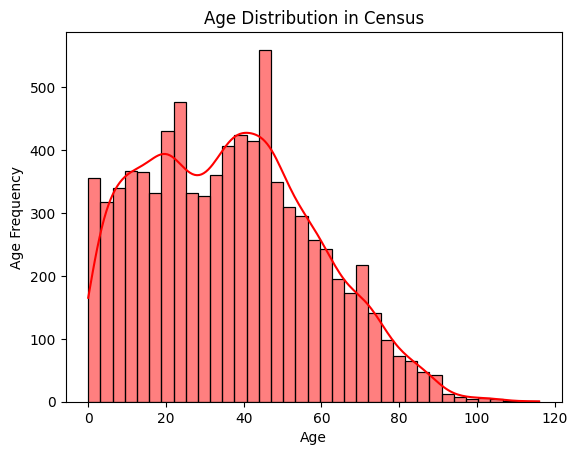

In [90]:
# Creating a  histogram for the Age column

age_dist = sns.histplot(data, x='Age', kde = True, color = 'r')
plt.ylabel('Age Frequency')
plt.title('Age Distribution in Census')
# Save the plot as a PNG image
plt.savefig('Age_Distribution_in_Census.png', bbox_inches='tight')

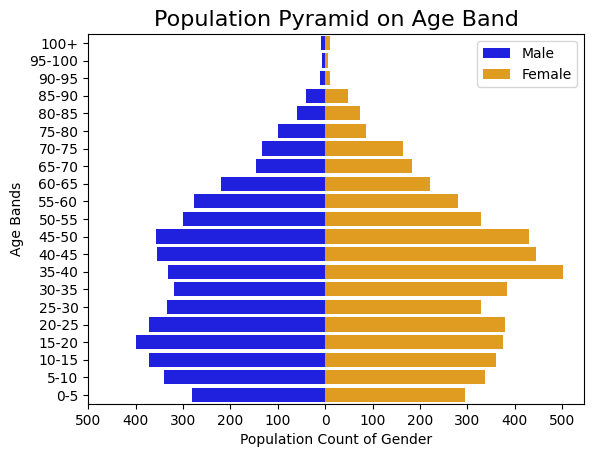

In [91]:
# Creating an age pyramid with to aid in analysing the Age distribution of the population by Gender

Age_group = [ ((i-1)*5 ,  (i-1)*5 + 5)  for i in range(1,21)] + [(100, 120)]
#print (Age_group)

Count_males = []
Count_females = []
for pp in Age_group:
    pA = data[data['Age'] <= pp[1]] 
    pB = pA[pA['Age'] >= pp[0] ]
    Count_males.append(len(pB[pB['Gender'] == 'Male']))
    Count_females.append(len(pB[pB['Gender'] == 'Female']))


Count_males = [(-1)*x for x in Count_males]
#print (Count_males)
#print (Count_females)

class_age= ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100', '100+']

class_age.reverse()
Count_males.reverse()
Count_females.reverse()

pyramid = pd.DataFrame({'Age': class_age,'Male': Count_males,'Female': Count_females})

age_pyramid = sns.barplot(x='Male', y='Age', data=pyramid, order=class_age, color=('blue'), label='Male')
age_pyramid = sns.barplot(x='Female', y='Age', data=pyramid, order=class_age, color=('orange'), label='Female')
age_pyramid.legend()

# Set the x-age_pyramidis tick locations and labels
xticks = [-500, -400, -300, -200, -100, 0, 100, 200, 300, 400, 500]
age_pyramid.set_xticks(xticks)
age_pyramid.set_xticklabels([abs(x) for x in xticks])

age_pyramid.set(xlabel='Population Count of Gender', ylabel='Age Bands')
plt.title('Population Pyramid on Age Band', fontsize=16)

# Save the plot as a PNG image
plt.savefig('Population pyramid on Gender.png', bbox_inches='tight')

# Display the plot
plt.show()

##### NB The Age Analysis above shows that population is more densed in the school going age as well as the 35- 50 age groups. This without further analysis shows the need for a train station to help commuters move between the town and other neighboring places. however, not every worker commutes and it is too early to decide that. Again, one can clearly see that, the population of children keeps declining over the various age bands, from 16-20, to 11-15, 6-10 & 0-5. This shows a declining birthrate within the town. Further analysis on birthrate would be calculated below. similarly population has been on the descend for the aging populace. This can be immediatly linked to death, however, further analysis would be carried out to determine if other factors like migration and divorce counts to this.

### Gender Analysis

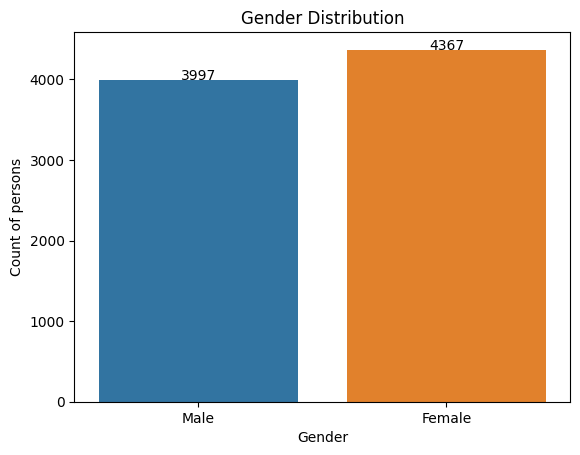

In [92]:
# create a gender countplot
sns.countplot(data=data, x='Gender', order=['Male', 'Female'])

# get the counts for each category and sort in the order of the countplot
counts = data['Gender'].value_counts()[['Male', 'Female']]

# add annotations to the plot using the sorted counts dataframe
for i, count in enumerate(counts):
    plt.text(i, count+1, str(count), ha='center')

# set labels and title
plt.ylabel('Count of persons')
plt.title('Gender Distribution')

# Save the plot as a PNG image
plt.savefig('Gender_countplot.png', bbox_inches='tight')

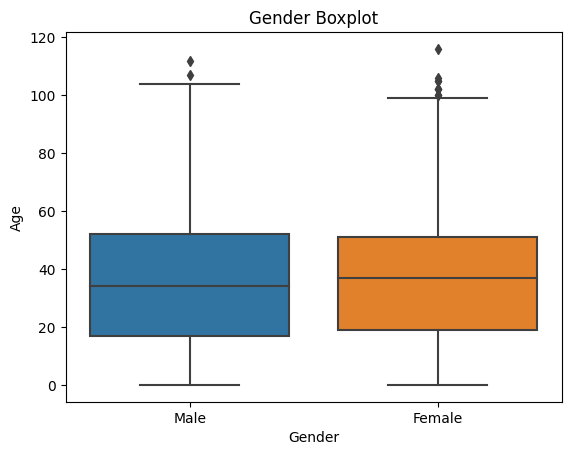

In [93]:
# Create boxplot of ages by gender
sns.boxplot(data, x='Gender', y='Age', order = ['Male', 'Female'])

# set labels and title
plt.title('Gender Boxplot')

# Save the plot as a PNG image
plt.savefig('Gender_boxplot.png', bbox_inches='tight')

##### NB Both male a female have almost relatively close medians thus 34 and 37 respectively. The female box plot shows a more concentrated 3rd quartile than the male counterparts. Again, there are more outliers in the female ages than there is for the male gender.

### Household Analysis

##### Grouping number of people in a household

In [94]:
# showing the data columns
data.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion', 'Age_Bands',
       'Occup_Classification', 'Num_Occupants'],
      dtype='object')

In [95]:
# Group by house number and street name by creating a dataframe

grouped_data_residence = data.groupby(['House Number', 'Street'])
count = grouped_data_residence.size().reset_index(name='num_occupants')
count

,House Number,Street,num_occupants
0,1,Aethelred Crescent,1
1,1,Aethelred Heights,4
2,1,Ahmed Spur,1
3,1,Anvilgain Road,1
4,1,Aries Spire,13
...,...,...,...
3055,193,Harvey Road,1
3056,194,Harvey Road,1
3057,195,Harvey Road,1
3058,196,Harvey Road,1


In [96]:
# prints the statistical summary of num_occupants

count['num_occupants'].describe()

count    3060.000000
mean        2.733333
std         1.930672
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        22.000000
Name: num_occupants, dtype: float64

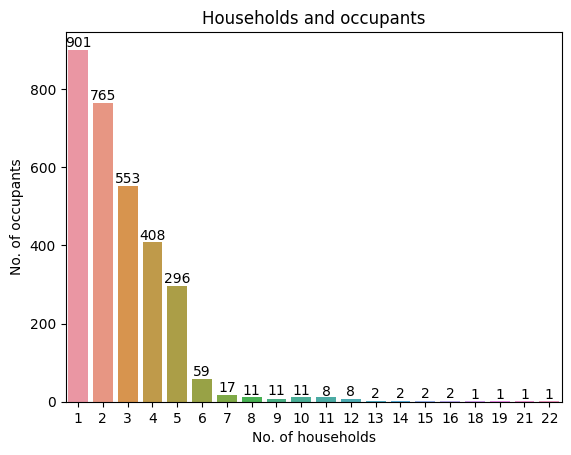

In [97]:
value_counts = count['num_occupants'].value_counts()

plot = sns.countplot(count, x='num_occupants')
# Annotate the bars with their respective values
for i, v in value_counts.items():
    plot.text(value_counts.index.get_loc(i), v, str(v), ha='center', va='bottom')
    
plt.title('Households and occupants')
plt.xlabel('No. of households')
plt.ylabel('No. of occupants')

# Save the plot as a PNG image
plt.savefig('Households and occupants.png', bbox_inches='tight')

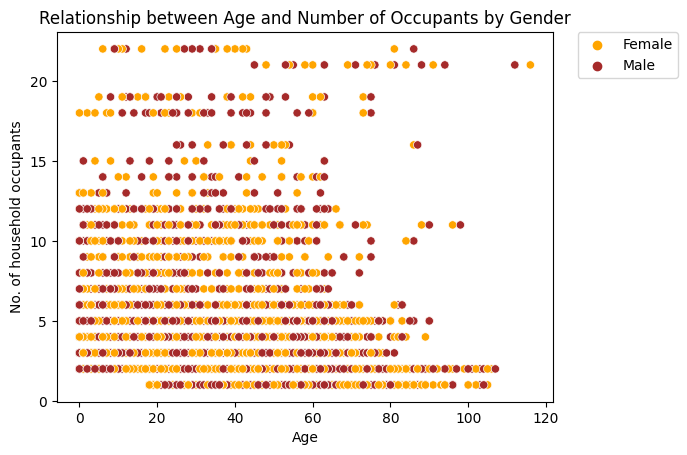

In [98]:
# Create scatterplot of age vs. household size
age_by_occupants = sns.scatterplot(data, x='Age', y='Num_Occupants', hue='Gender', palette=['orange', 'brown'])
plt.ylabel('No. of household occupants')
plt.title('Relationship between Age and Number of Occupants by Gender')

# Move the legend to the top right corner
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Save the plot as a PNG image
plt.savefig('Relationship between Age and Occupants by Gender.png', bbox_inches='tight')


In [99]:
# Create pivot table of age bands and household size

pivot_table = data.pivot_table(index='Age_Bands', columns=['Num_Occupants'], values='Surname', aggfunc='count')
pivot_table

Num_Occupants,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,21,22
Age_Bands,,,,,,,,,,,,,,,,,,,,
0-5,0,53,109,157,150,28,13,12,4,14,9,14,6,0,2,0,3,1,0,0
5-10,0,49,111,153,140,45,17,7,9,11,6,11,3,3,1,0,2,1,0,4
10-15,0,53,156,157,133,35,17,8,8,4,4,9,1,1,1,0,3,6,0,2
15-20,30,95,138,143,126,27,12,8,8,7,12,8,2,2,2,0,3,5,0,1
20-25,67,110,90,112,123,30,9,8,10,10,14,9,1,3,1,1,6,5,0,2
25-30,62,99,104,97,90,26,7,10,5,9,9,7,3,2,2,2,2,2,0,2
30-35,57,118,129,130,100,16,4,3,4,15,5,6,4,4,1,1,6,1,0,5
35-40,53,129,175,134,131,31,7,3,3,9,10,7,1,2,0,3,1,3,0,2
40-45,57,97,166,144,125,19,8,7,7,8,12,6,2,2,2,2,3,2,1,2


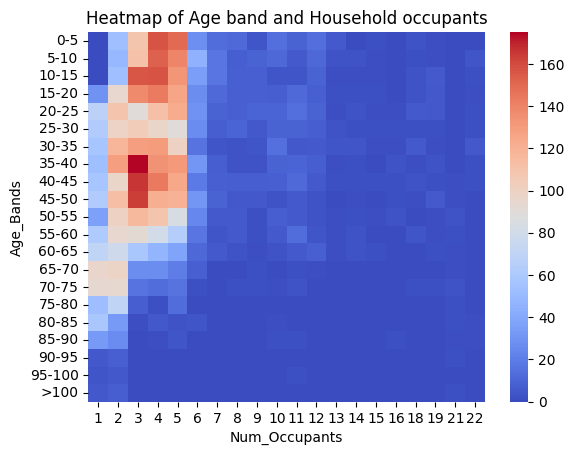

In [100]:
# Create heatmap of age bands and household size

sns.heatmap(pivot_table, cmap='coolwarm')
plt.title('Heatmap of Age band and Household occupants')

# Save the plot as a PNG image
plt.savefig('Age_band_and_Household_occupants.png', bbox_inches='tight')

In [101]:
#shows unique values in num_occupants
data['Num_Occupants'].unique()

array([ 3,  5,  4,  7,  1,  2,  6,  9, 18, 11,  8, 10, 16, 21, 12, 19, 22,
       14, 13, 15], dtype=int64)

In [102]:
# calculating the mean occupancy for the town

avg_occupancy = round(count['num_occupants'].mean(),0)
print('The average occupancy within the town is', avg_occupancy)

The average occupancy within the town is 3.0


In [103]:
# checking the number of people in the dataseries

count['num_occupants'].sum()

8364

In [104]:

#  identify households with below or equal to the average occupancy
below_average_occupants = count['num_occupants'] <= avg_occupancy


# count the number of households with below or equal to the average occupancy
count_below_average_occupants = below_average_occupants.sum()
print("Number of households with below or equal to the average occupancy:", count_below_average_occupants)


print()
# calculate the total number of people who live in households with below or equal to the average occupancy
occupants_in_below_average = count.loc[below_average_occupants, 'num_occupants'].sum()
print("Total number of people who live in households with below or equal to the average occupancy:", occupants_in_below_average)

# identify households with more than the average occupancy
above_average_occupants = count['num_occupants'] > avg_occupancy

print()
# count the number of households with more than the average occupancy
count_above_average_occupants = above_average_occupants.sum()
print("Number of households with more than the average occupancy:", count_above_average_occupants)

print()


# calculate the total number of people who live in households with more than the average occupancy
occupants_in_above_average = count.loc[above_average_occupants, 'num_occupants'].sum()
print("Total number of people who live in households with more than the average occupancy:", occupants_in_above_average)

print()
# find the number of households which have one occupancy
one_occupancy = (count['num_occupants'] == 1).sum()
print("Total number of one occupant household in the Town is:", one_occupancy)

print()
#finding the percentage of houses occupied by one person.
perc_one_occupancy = round(one_occupancy / len(count['num_occupants']) * 100,2)
print(f"{perc_one_occupancy}% of the total number of househould is occupied by one occupant") 

Number of households with below or equal to the average occupancy: 2219

Total number of people who live in households with below or equal to the average occupancy: 4090

Number of households with more than the average occupancy: 841

Total number of people who live in households with more than the average occupancy: 4274

Total number of one occupant household in the Town is: 901

29.44% of the total number of househould is occupied by one occupant


##### NB the housing occupancy analysis is rather an interesting one. There are a total of 3060 households within the town. whilst the average number of occupants per household (2.7) thus 3, which is not so far from the current UK average occupany rate of (2.4) thus 2, a deep dive into the data revealed some worrying findings. The two most oldest people in the town live in a 21 occupancy house which is definitely not good for their welfare, contrary, there are also about 200 people aged over 80 years who live in one or two occupant houses. These old people, most of which are Married, Single or Widowed should not be left to cater for themselves due to old age. In general, about 30% of all households (901) within the town is occupied by only one person. This definetly has significant impact oon the calculation of the average occupancy. Lastly, the proportion of households with equal or below the average occupancy stands at 72.5% which suggests that  27.5% of households in the town houses 4274 people which is 51.1% of the total population.

##### Occupation Analysis

In [105]:
data['Occupation'].value_counts().head(50)

Student                                    1581
University Student                          530
Unemployed                                  487
Child                                       470
Retired Unknown                              42
Armed forces operational officer             16
Proofreader                                  15
Research officer, government                 15
Risk analyst                                 14
Surveyor, mining                             14
Engineer, manufacturing                      14
Doctor, general practice                     13
Health promotion specialist                  13
Psychologist, counselling                    13
Engineer, civil (contracting)                13
Colour technologist                          13
Chartered management accountant              13
Nurse, adult                                 13
Scientist, marine                            13
Exhibitions officer, museum/gallery          12
Barista                                 

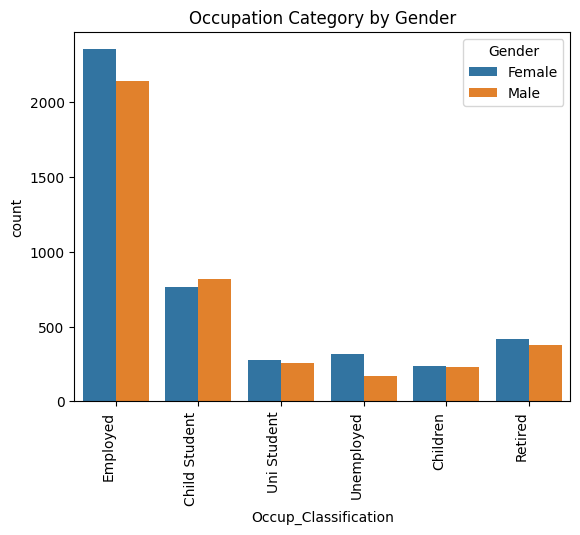

<Figure size 640x480 with 0 Axes>

In [106]:
# Create a graph on Occupation category

sns.countplot(data=data, x='Occup_Classification', hue = 'Gender')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Gender')
plt.title('Occupation Category by Gender')
plt.show()

# Save the plot as a PNG image
plt.savefig('Occupation_Category_by_Gender.png', bbox_inches='tight')

In [107]:
# count of unique values in occupation classification
data['Occup_Classification'].value_counts()

Employed         4495
Child Student    1581
Retired           791
Uni Student       540
Unemployed        487
Children          470
Name: Occup_Classification, dtype: int64

In [108]:
occup_perc = pd.DataFrame({'Occup Classificatiom': ['Employed', 'Child Student', 'Retired', 'Uni Student', 'Unemployed', 'Children'],
                     'Count': [4495, 1581, 791, 540, 487, 470]})

# Compute percentage of each item
total = occup_perc['Count'].sum()
occup_perc['Percentage'] = round(occup_perc['Count'] / total * 100,1)

# Display the result
occup_perc


,Occup Classificatiom,Count,Percentage
0,Employed,4495,53.7
1,Child Student,1581,18.9
2,Retired,791,9.5
3,Uni Student,540,6.5
4,Unemployed,487,5.8
5,Children,470,5.6


In [109]:
# finding the working class and working class unemployment rate

age_range_data = data[data['Age'].between(16, 65)]
age_range_count = len(age_range_data)
print('Number of people aged between 16 and 65:', age_range_count)

working_class_unemp = (len(data[(data['Occup_Classification']=='Unemployed')])/age_range_count)*100
working_class_unemp

Number of people aged between 16 and 65: 5721


8.512497815067297

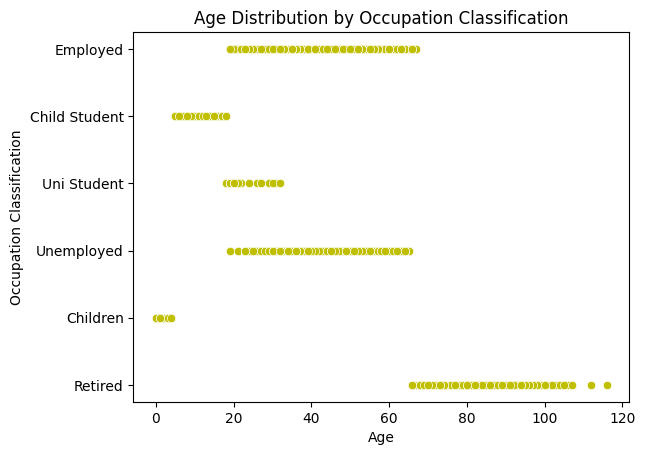

In [110]:
#create a scatter plot on age and occupation classification

age_by_occup_cat = sns.scatterplot(data, x = 'Age', y = 'Occup_Classification', color='y')
plt.ylabel('Occupation Classification')
plt.title('Age Distribution by Occupation Classification')

# Save the plot as a PNG image
plt.savefig('Age Distribution by Occupation Classification.png', bbox_inches='tight')

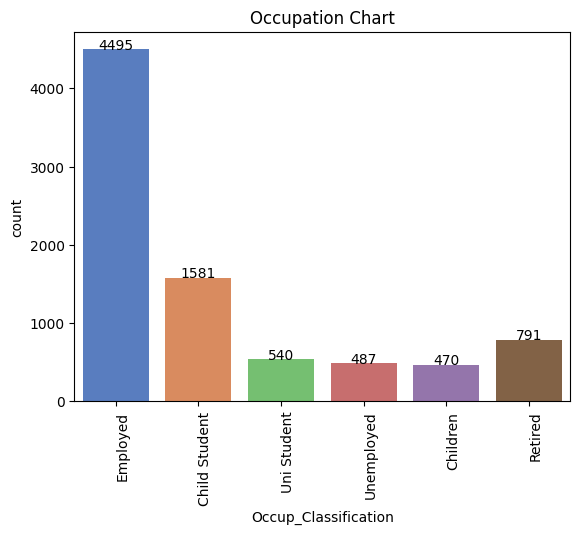

In [111]:
# Create stacked bar chart of occupation classification by gender and religion

occupation_chart = sns.countplot(data, x='Occup_Classification', palette='muted')
plt.xticks(rotation=90, ha='left')
plt.title('Occupation Chart')
# get the counts for each category and sort in the order of the countplot
counts = data['Occup_Classification'].value_counts()[['Employed', 'Child Student', 'Uni Student', 'Unemployed', 'Children', 'Retired']]

# add annotations to the plot using the sorted counts dataframe
for i, count in enumerate(counts):
    plt.text(i, count+1, str(count), ha='center')
    
# Save the plot as a PNG image
plt.savefig('Occupantation_Classifiction_Chart.png', bbox_inches='tight')

##### NB The main Occupation was further categorised into 6 sub groups namely; Employed, Child Student, Uni Student, Unemployed, Children and Retired. This new categorisation became necessary since, there were various job roles under the Occupation column, again, retired workers still had 'Retired adjoined to their previous roles. In doing this, all children aged below  5, were named as children, retired workers were named as Retired, University Students and PhD Students were named as Uni Students and child student thus children aged between 4 and 18 were kept as Child Student. These categories assisted me in identifying the commuter within the town as well as helping us answer which investment to carry out

### Marital Status Analysis

In [112]:
data['Marital Status'].value_counts()

Single           2997
Married          2220
Single-minors    1971
Divorced          790
Widowed           386
Name: Marital Status, dtype: int64

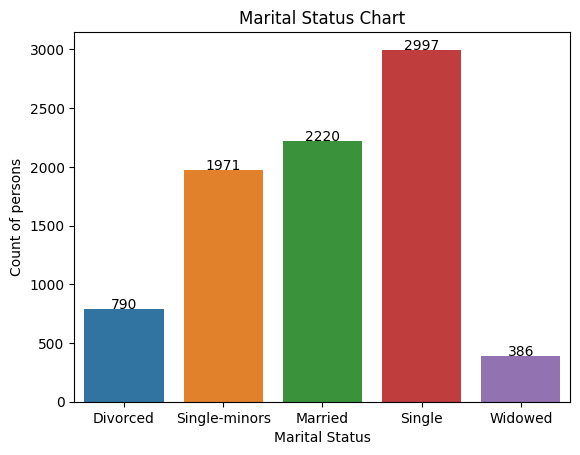

In [113]:
# Create bar chart of marital status

sns.countplot(data, x='Marital Status')
plt.ylabel('Count of persons')
plt.title('Marital Status Chart')
# get the counts for each category and sort in the order of the countplot
counts = data['Marital Status'].value_counts()[['Divorced', 'Single-minors', 'Married', 'Single', 'Widowed']]
# add annotations to the plot using the sorted counts dataframe
for i, count in enumerate(counts):
    plt.text(i, count+1, str(count), ha='center')
    
# Save the plot as a PNG image
plt.savefig('Marital_Status_Chart.png', bbox_inches='tight')    

In [114]:
# finding the number of people who are older than 18 years and the marriage rate of the town

len(data[data['Age']>=18])
marriage_rate = round((len(data[data['Marital Status']== 'Married'])/len(data[data['Age']>=18]))*1000,0)
print(f"The town's marriage rate is {marriage_rate} marriages per 1000")

The town's marriage rate is 347.0 marriages per 1000


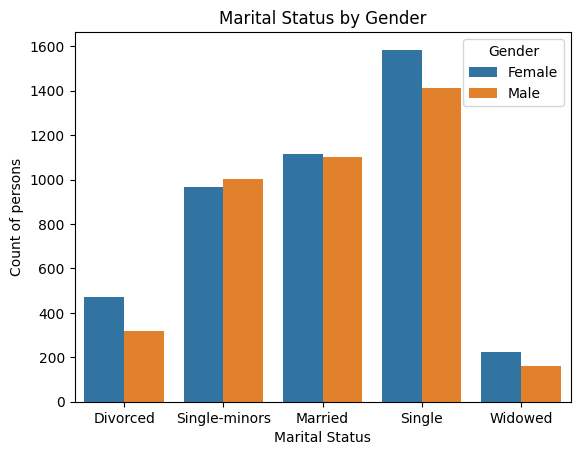

In [115]:
# Create bar chart of marital status distribution by gender

sns.countplot(data, x='Marital Status', hue='Gender')
plt.ylabel('Count of persons')
plt.title('Marital Status by Gender')

# Save the plot as a PNG image
plt.savefig('marital_status_by_gender.png', bbox_inches='tight')

In [116]:
# retrieving the columns of the dataset
data.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion', 'Age_Bands',
       'Occup_Classification', 'Num_Occupants'],
      dtype='object')

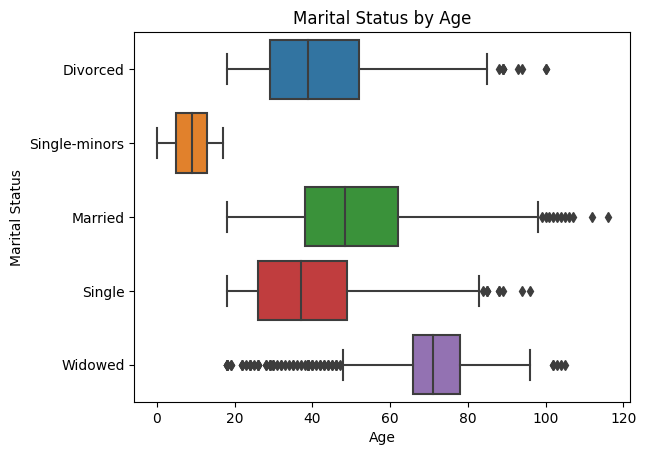

In [117]:
# A boxplot on Marital Status and Age

marital_stat_age = sns.boxplot(data, x = 'Age', y = 'Marital Status')
plt.title('Marital Status by Age')

# Save the plot as a PNG image
plt.savefig('Marital_Status_by_Age_Chart.png', bbox_inches='tight')

##### NB Using the box plot to analyse the Marital Status column by age, one can see the presence of outliers with each item in the graph. However, the interesting one is the Widowed plot which shows a lot of outliers before the first quartile than after the last quartile. There are also people aged below 20 who are already widowed. Another intersting story is the Singe plot which shows outliers after age 80 who are single.

Text(0.5, 1.0, 'Marital Status by Age')

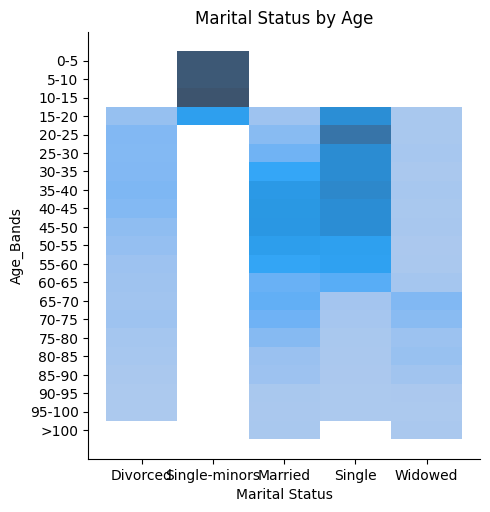

In [118]:
# create scatterplot on Marital status and Age

sns.displot(data, x = 'Marital Status', y = 'Age_Bands')
plt.title('Marital Status by Age')



In [119]:
#statistical info of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
House Number,8364.0,31.192970,34.259426,1.0,9.0,20.0,40.0,197.0
Age,8364.0,36.335127,21.780068,0.0,19.0,36.0,51.0,116.0
Num_Occupants,8364.0,4.096604,3.031304,1.0,2.0,4.0,5.0,22.0


In [120]:
# columns of the data
data.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion', 'Age_Bands',
       'Occup_Classification', 'Num_Occupants'],
      dtype='object')

### Religion Analysis

Text(0.5, 1.0, 'Religion Chart')

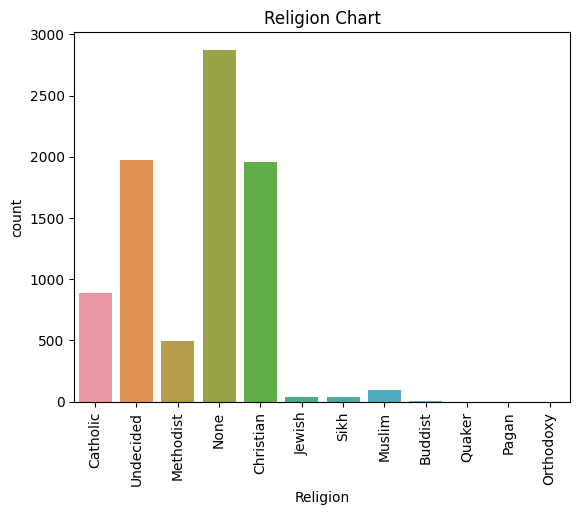

In [121]:
# Create a countplot for Religion

sns.countplot(data, x = 'Religion')
plt.xticks(rotation = 90)
plt.title('Religion Chart')

In [122]:
# Check the count and unique values under Religion

data['Religion'].value_counts()

None         2874
Undecided    1971
Christian    1956
Catholic      885
Methodist     499
Muslim         97
Sikh           40
Jewish         36
Buddist         3
Quaker          1
Pagan           1
Orthodoxy       1
Name: Religion, dtype: int64

In [123]:
# Create a dataframe on religion column
religion_perc = pd.DataFrame({'Religion': ['None', 'Undecided', 'Christian', 'Catholic', 'Methodist', 'Muslim', 'Sikh', 'Jewish', 'Buddist', 'Quaker', 'Pagan', 'Orthodoxy'],
                     'Count': [2874, 1971, 1956, 885, 499, 97, 40, 36, 3, 1, 1, 1]})

# Compute percentage of each item
total = religion_perc['Count'].sum()
religion_perc['Percentage'] = round(religion_perc['Count'] / total * 100,1)

# Display the result
religion_perc


,Religion,Count,Percentage
0,None,2874,34.4
1,Undecided,1971,23.6
2,Christian,1956,23.4
3,Catholic,885,10.6
4,Methodist,499,6.0
5,Muslim,97,1.2
6,Sikh,40,0.5
7,Jewish,36,0.4
8,Buddist,3,0.0
9,Quaker,1,0.0


In [124]:
# adding religions with less than 1% to a new group called Others

data['Religion'] = data['Religion'].replace(('Sikh','Jewish', 'Buddist','Pagan', 'Orthodoxy', 'Quaker'), 'Others')

In [125]:
# Checking the unique counts after grouping

data['Religion'].value_counts()

None         2874
Undecided    1971
Christian    1956
Catholic      885
Methodist     499
Muslim         97
Others         82
Name: Religion, dtype: int64

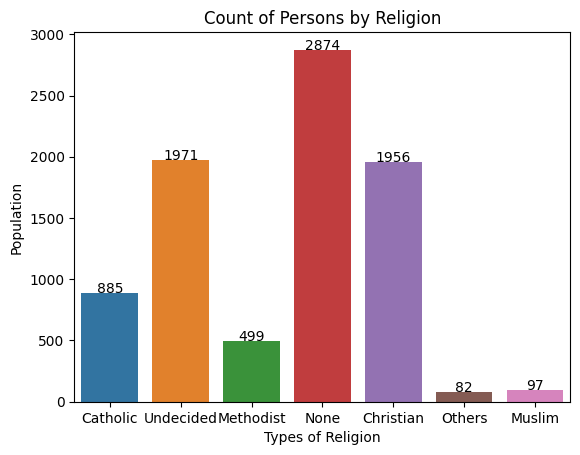

In [126]:
# Create a count plot for the new grouping of Religion

sns.countplot(data, x = 'Religion')
plt.xlabel('Types of Religion')
plt.ylabel('Population')
plt.title('Count of Persons by Religion')

# get the counts for each category and sort in the order of the countplot
counts = data['Religion'].value_counts()[['Catholic', 'Undecided', 'Methodist', 'None', 'Christian', 'Others', 'Muslim']]
# add annotations to the plot using the sorted counts dataframe
for i, count in enumerate(counts):
    plt.text(i, count+1, str(count), ha='center')
    
# Save the plot as a PNG image
plt.savefig('Population_by_Religion_plot', bbox_inches='tight')

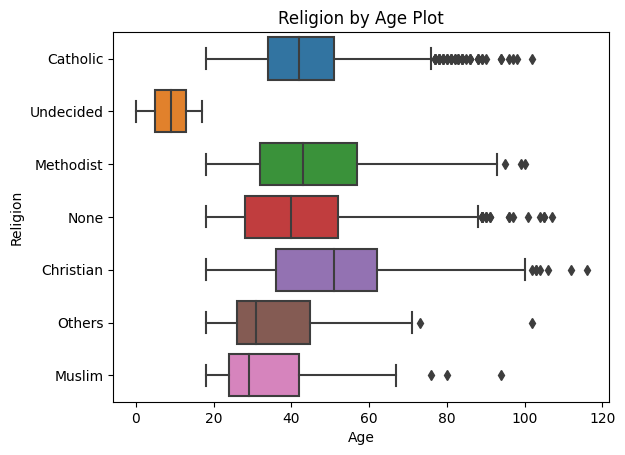

In [127]:
# Create a boxplot for the new grouping of Religion on Age

reli_by_age_plot = sns.boxplot(data, x = 'Age', y = 'Religion')
plt.ylabel('Religion')
plt.title('Religion by Age Plot')

# Save the plot as a PNG image
plt.savefig('reli_by_age_plot.png', bbox_inches='tight')

##### NB There are 12 religion groupings within the town. Out of this, groups with representation of less than 1% were reclassified as 'Others' thus Sikh, Jewish, Buddist, Quaker, Pagan & Orthodoxy. The box plot shows a growing population within the Others category and the Muslim community. In addition, the presence of alot of outliers with Catholics shows that, alot more people are above 80 years within that religion.

##### Infirmity Analysis

In [128]:
data['Infirmity'].value_counts()

None                   8295
Physical Disability      18
Unknown                  13
Mental Disability        10
Blind                     9
Disabled                  8
Deaf                      7
Unknown Infection         4
Name: Infirmity, dtype: int64

Text(0.5, 1.0, 'Infirmity plot')

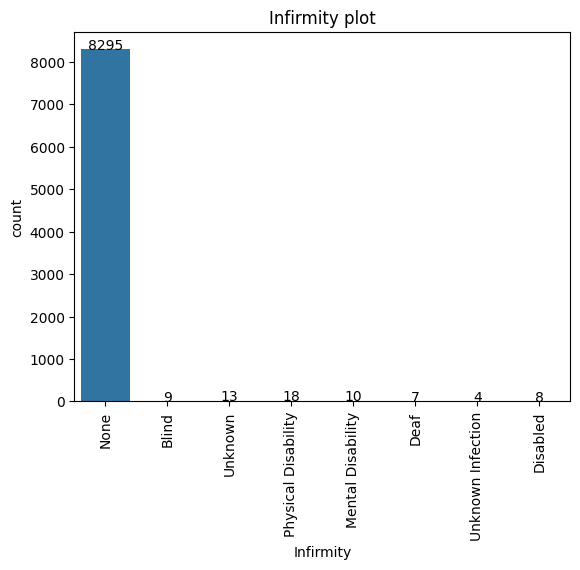

In [129]:
#plot infirmities within the town

all_infirmities = sns.countplot(data, x = 'Infirmity')
plt.xticks(rotation = 90)
counts = data['Infirmity'].value_counts()[['None', 'Blind', 'Unknown', 'Physical Disability', 'Mental Disability', 'Deaf', 'Unknown Infection', 'Disabled']]
# add annotations to the plot using the sorted counts dataframe
for i, count in enumerate(counts):
    plt.text(i, count+1, str(count), ha='center')
plt.title('Infirmity plot')    

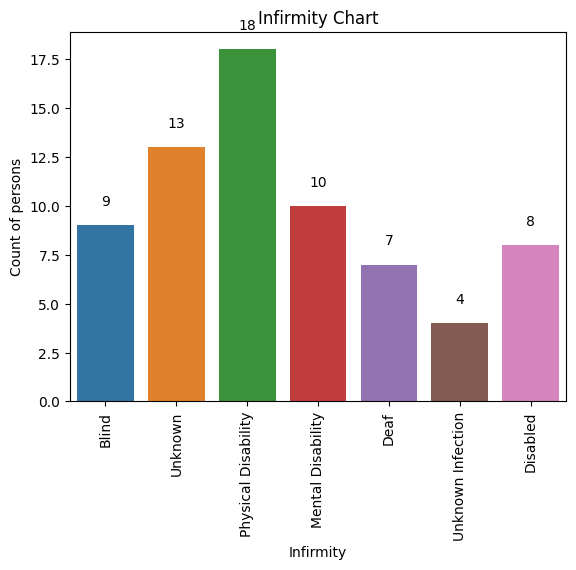

In [130]:
#creating an infirmity plot without 'none'
infirmity_plot = sns.countplot(data[data['Infirmity'] != 'None'], x = 'Infirmity')
plt.xticks(rotation = 90)
plt.ylabel('Count of persons')
plt.title('Infirmity Chart')
# get the counts for each category and sort in the order of the countplot
counts = data['Infirmity'].value_counts()[['Blind', 'Unknown', 'Physical Disability', 'Mental Disability', 'Deaf', 'Unknown Infection', 'Disabled']]
# add annotations to the plot using the sorted counts dataframe
for i, count in enumerate(counts):
    plt.text(i, count+1, str(count), ha='center')
    
# Save the plot as a PNG image
plt.savefig('infirmity_Chart.png', bbox_inches='tight')    

##### NB from a general outlook, the population looks like a healthy town. with only 0.82% of the population with infirmities. However, it is important for that further medical attention is given two the 4 people with unknown infections inorder to prevent transmission if these infections are transmissable. this is also true for the 13 people who left their the infirmity column blank when filling the form

### Relationship to Head of House Analysis

In [131]:
# count of unique entries in relation to head of house column
data['Relationship to Head of House'].value_counts()

Head                     3069
Son                      1426
Daughter                 1334
Husband                   807
Tenant                    599
Wife                      299
Lodger                    280
Partner                   241
Granddaughter              86
Grandson                   69
Cousin                     37
Sibling                    32
Visitor                    20
Step-Daughter              16
Adopted Daughter           12
Nephew                     10
Adopted Son                10
Step-Son                    9
Neice                       6
Adopted Granddaughter       2
Name: Relationship to Head of House, dtype: int64

Text(0.5, 1.0, 'Count of Persons by Relationship to Head of House')

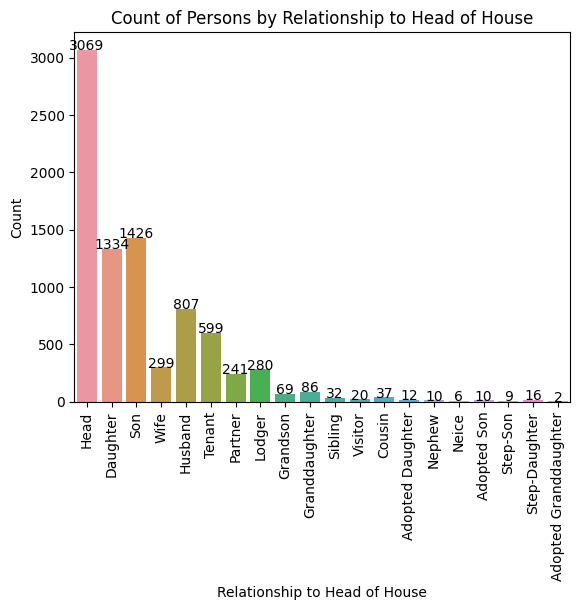

In [132]:
sns.countplot(data, x = 'Relationship to Head of House')
plt.xticks(rotation = 90)

# get the counts for each category and sort in the order of the countplot
counts = data['Relationship to Head of House'].value_counts()[['Head', 'Daughter', 'Son', 'Wife', 'Husband', 'Tenant', 'Partner', 'Lodger', 'Grandson', 'Granddaughter', 'Sibling', 'Visitor', 'Cousin', 'Adopted Daughter', 'Nephew', 'Neice', 'Adopted Son', 'Step-Son', 'Step-Daughter', 'Adopted Granddaughter']]
# add annotations to the plot using the sorted counts dataframe
for i, count in enumerate(counts):
    plt.text(i, count+1, str(count), ha='center')

# Set x-axis and y-axis labels and plot title
plt.xlabel('Relationship to Head of House')
plt.ylabel('Count')
plt.title('Count of Persons by Relationship to Head of House')

##### NB There are over 3000 head of houses representing the number of households within the town.

### Commuters Analysis

In [133]:
# from the occupation groupings into categories, University Students and PhD students were grouped as Uni Students
Uni_Student = data[(data['Occup_Classification']== 'Uni Student')]
print('The number of University Students including Phd Students are:', len(Uni_Student))

The number of University Students including Phd Students are: 540


In [134]:
employed = data[(data['Occup_Classification']== 'Employed')]
print('The employed people are:', len(employed))

The employed people are: 4495


In [135]:
# for loop to all the various roles in the employed category 

workers = []
for value in data['Occupation']:
    if data.loc[data['Occupation'] == value, 'Occup_Classification'].iloc[0] == 'Employed':
        workers.append(value)
        #print(workers)

In [136]:
# Convert the workers list to a set to get unique values

unique_workers = set(workers)
len(unique_workers)

639

In [137]:
#Print the unique roles for the employed category in the community.
unique_workers

{'Academic librarian',
 'Accommodation manager',
 'Accountant, chartered',
 'Accountant, chartered certified',
 'Accountant, chartered management',
 'Accountant, chartered public finance',
 'Accounting technician',
 'Actor',
 'Actuary',
 'Acupuncturist',
 'Administrator',
 'Administrator, Civil Service',
 'Administrator, arts',
 'Administrator, charities/voluntary organisations',
 'Administrator, education',
 'Administrator, local government',
 'Administrator, sports',
 'Adult guidance worker',
 'Adult nurse',
 'Advertising account executive',
 'Advertising account planner',
 'Advertising art director',
 'Advertising copywriter',
 'Advice worker',
 'Aeronautical engineer',
 'Agricultural consultant',
 'Agricultural engineer',
 'Aid worker',
 'Air broker',
 'Air cabin crew',
 'Air traffic controller',
 'Airline pilot',
 'Ambulance person',
 'Amenity horticulturist',
 'Analytical chemist',
 'Animal nutritionist',
 'Animal technologist',
 'Animator',
 'Applications developer',
 'Arboricul

In [138]:
data['Occupation'].value_counts().head(60)

Student                                    1581
University Student                          530
Unemployed                                  487
Child                                       470
Retired Unknown                              42
Armed forces operational officer             16
Proofreader                                  15
Research officer, government                 15
Risk analyst                                 14
Surveyor, mining                             14
Engineer, manufacturing                      14
Doctor, general practice                     13
Health promotion specialist                  13
Psychologist, counselling                    13
Engineer, civil (contracting)                13
Colour technologist                          13
Chartered management accountant              13
Nurse, adult                                 13
Scientist, marine                            13
Exhibitions officer, museum/gallery          12
Barista                                 

In [139]:
# as a result commuters can be calculated as follows:

town_employed = 0.2 * len(employed)
commuters = round(len(Uni_Student) + len(employed) - (town_employed),0)
print( 'Total commuters within the town are:', int(commuters))

Total commuters within the town are: 4136


In [140]:
# calculate percentage of commuters to the total populationlen

commuter_perc = (commuters/len(data)) * 100
rounded_perc = round(commuter_perc, 2)
print(f'{rounded_perc}% of people within the town commute')


49.45% of people within the town commute


##### NB job roles including but not limited to the following accommodation manager, academic librarian, administrators, aid worker, amenity horticulturist, bookseller, buyer retail, community pharmacist, secretary and education officer could all be occupations within the town hence does not require any form of commuting to nearby cities. As a result of this, I assume that 20% of the total unique job roles for the employed category work within the town thus 128 unique jobs. All things being equal, this further translates to 899 (20% of 4495) people within the workforce who do not commute. Summing it up, the total estimated commuters within the community stands at  (49.45%) almost half of the town population. This shows that there is alot of pressure on the road network in and out of the town. 

##### Birth Rate Analysis

In [141]:
# Determining the Birthrate per 1000 births

zero_aged = data[(data['Age']== 0)]
zero_aged
len(zero_aged)

birth_rate_1 = round((len(zero_aged)/ len(data)) * 1000)
print('The current birthrate per 1000 for the town is', birth_rate_1)

The current birthrate per 1000 for the town is 10


In [142]:
# finding the prior 5 year difference between crude birth over a 5 year period

five_aged = data[(data['Age']== 5)]
five_aged
len(five_aged)

birthrate_2 = round((len(five_aged)/ len(data)) * 1000)
print('The 5 year prior birthrate per 1000 for the town is', birthrate_2)

The 5 year prior birthrate per 1000 for the town is 13


In [143]:
crude_birthrate = birthrate_2 - birth_rate_1
print(f'Birth rate declined by {crude_birthrate} births per 1000')

Birth rate declined by 3 births per 1000


##### NB the birthrate declined  by about 3 children per 1000 births in a five-year period

In [144]:
# Determining the age specific birthrate per 1000 females


Females  = data[data['Gender'] == 'Female']
Females

child_bearing_20_25 = Females[(Females['Age']>=20) & (Females['Age']<= 25)]
child_bearing_20_25

birth_rate_20_25 = round(len(zero_aged)/len(child_bearing_20_25) * 1000)
print('The age specific of 25-30 birthrate per 1000 for the town is', birth_rate_20_25)

The age specific of 25-30 birthrate per 1000 for the town is 226


In [145]:
# Determining the age specific birthrate per 1000 females aged 25 - 30


child_bearing_25_30 = Females[(Females['Age']>=25) & (Females['Age']<= 30)]
child_bearing_25_30

birth_rate_25_30 = round(len(five_aged)/len(child_bearing_25_30) * 1000)
print('The age specific of 25-30 birthrate per 1000 for the town is', birth_rate_25_30)

The age specific of 25-30 birthrate per 1000 for the town is 319


In [146]:
# Calculating the  growth or decline in age specific 

age_birth_rate = birth_rate_25_30 -birth_rate_20_25
print(f'Birthrate has declined by {age_birth_rate} births over the period')

Birthrate has declined by 93 births over the period


##### NB The difference between the age specific birthrates shows that average births reduced by 93 births which corrobrates the declining crude birth rate above. In general, birth rate has been on the decline in the last 20 years (NB without accounting for the possibility of child deaths)

##### NB since there is no previous census data to aid us calculate the Birth rate, I used the crude birthrate and the Age specific birth rates to determine the growth or decline in birthrates of the town

##### Death Rate Analysis

In [147]:
# Calculating the death rate for the town
age_class_80_85 = len(data[data['Age'].between(80,85)])
age_class_85_90 = len(data[data['Age'].between(85,90)])
print(f'There are {age_class_80_85} people in the 80 to 85 age group')
print(f'There are {age_class_85_90} people  in the 85 to 90 age group')
print()

# death per year calculation
deaths_per_year = (age_class_80_85 - age_class_85_90)/5
print('Number of deaths per year', deaths_per_year)

print()
death_rate_for_period = round((age_class_80_85 - age_class_85_90) / (age_class_80_85 + age_class_85_90) * 1000, 0)
print('Death rate for the period is', death_rate_for_period)

print()
death_rate = round(death_rate_for_period/5,0)
print(f'Death rate per year is {death_rate} per 1000')

There are 133 people in the 80 to 85 age group
There are 90 people  in the 85 to 90 age group

Number of deaths per year 8.6

Death rate for the period is 193.0

Death rate per year is 39.0 per 1000


In [148]:
# Calculating death rate for age groups from age 60 - 120 years

age_group = ['60-65 & 65-70', '70-75 & 75-80', '80-85 & 85-90', '90-95 & 95-100', '100-105 & 105-110', '110-115 & 115-120']
group_1 = [(60,65), (70,75), (80,85), (90,95), (100,105), (110,115)]
group_2 = [(65,70), (75,80), (85,90), (95,100), (105,110), (115,120)]
count_group_1 = [len(data[data['Age'].between(item[0],item[1])]) for item in group_1]
count_group_2 = [len(data[data['Age'].between(item[0],item[1])]) for item in group_2]

print(count_group_1)
print(count_group_2)

death_rate_per_annum = pd.DataFrame({'Age-Group': age_group, 'Count_1': count_group_1, 'Count_2': count_group_2})
death_rate_per_annum

[439, 299, 133, 22, 13, 1]
[330, 187, 90, 13, 4, 1]


,Age-Group,Count_1,Count_2
0,60-65 & 65-70,439,330
1,70-75 & 75-80,299,187
2,80-85 & 85-90,133,90
3,90-95 & 95-100,22,13
4,100-105 & 105-110,13,4
5,110-115 & 115-120,1,1


In [149]:
death_rate_per_annum['Pop Size'] = death_rate_per_annum['Count_1'] + death_rate_per_annum['Count_2']
death_rate_per_annum['Number of Death'] = death_rate_per_annum['Count_1'] - death_rate_per_annum['Count_2']
death_rate_per_annum['Death Rate per Annum'] = round(((death_rate_per_annum['Number of Death']/death_rate_per_annum['Pop Size'])*1000)/5,0)
death_rate_per_annum

,Age-Group,Count_1,Count_2,Pop Size,Number of Death,Death Rate per Annum
0,60-65 & 65-70,439,330,769,109,28.0
1,70-75 & 75-80,299,187,486,112,46.0
2,80-85 & 85-90,133,90,223,43,39.0
3,90-95 & 95-100,22,13,35,9,51.0
4,100-105 & 105-110,13,4,17,9,106.0
5,110-115 & 115-120,1,1,2,0,0.0


In [150]:
age_group_death_rate = round(death_rate_per_annum['Death Rate per Annum'].sum()/len(death_rate_per_annum['Death Rate per Annum']),1)
print('Death rate for the period is', age_group_death_rate)

Death rate for the period is 45.0


In [151]:
# finding the number of people who are older than 45 years
len(data[data['Age']>=45])
len(data[data['Age']>=45])/len(data)

0.35700621712099473

##### NB the calculations for death rate is one with alot of loopholes. the sheer difference between two age groups does not necessarily mean death. It could be as a result of divorce or migration related to divorce. Again, it is wrong to assume that two age groups would have the same number of people at the same age.

##### Even though life expectancy hovered around 40 - 45years in 1881, 36% of the population are above this age which would make it incorrect for us to base our death rate caluclations around these age groups

##### Immigrant Analysis

In [152]:
# Calculation for Immigration based on Visitors and Lodgers in relationship to head of house

visitors = data[(data['Relationship to Head of House'] == 'Visitor')]
print(f' Total number of visitors:', len(visitors))


lodgers = data[(data['Relationship to Head of House'] == 'Lodger')]
print(f"Total number of lodgers: {len(lodgers)}")

immigration_rate = round((len(visitors) + len(lodgers)) / len(data) * 1000, 0)
print(f"The Immigration rate per 1000 is: {immigration_rate}")

 Total number of visitors: 20
Total number of lodgers: 280
The Immigration rate per 1000 is: 36.0


##### NB The immigration rate is specifically low thus for every 1000 people there are 36 immigrants which hovers a little above 3%.

##### Divorce Analysis

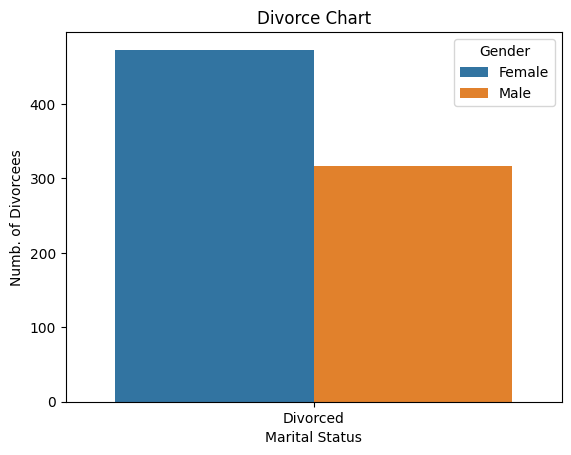

In [153]:
divorce_plot = sns.countplot(data[data['Marital Status'] == 'Divorced'], x = 'Marital Status', hue = 'Gender')

plt.ylabel('Numb. of Divorcees')
plt.title('Divorce Chart')

# Save the plot as a PNG image
plt.savefig('Divorce_Chart.png', bbox_inches='tight')

In [154]:
# Filter the data for individuals who are divorced
divorced = data[data['Marital Status'] == 'Divorced']

# Group the data by Gender and count the number of individuals in each group
gender_counts = divorced.groupby('Gender')['Gender'].count()

# Calculate the percentage of individuals in each gender group over the total number of divorced individuals
gender_perc = round(gender_counts / len(divorced) * 100)

# Combine the gender counts and percentage into a new DataFrame
divorced_gender = pd.concat([gender_counts, gender_perc], axis=1)
divorced_gender.columns = ['Count', 'Percentage']

# Add a Total row at the bottom of the table
divorced_gender.loc['Total'] = divorced_gender.sum()

# Format the percentage column as a percentage with one decimal point
divorced_gender['Percentage'] = divorced_gender['Percentage'].apply(lambda x: '{:.1f}%'.format(x))

# Display the final table
print(divorced_gender)


        Count Percentage
Gender                  
Female  473.0      60.0%
Male    317.0      40.0%
Total   790.0     100.0%


In [155]:
male_divorcees = len(data[(data['Marital Status'] == 'Divorced') & (data['Gender'] == 'Male')])
print('The total number of male divorcees is:', male_divorcees)

female_divorcees = len(data[(data['Marital Status'] == 'Divorced') & (data['Gender'] == 'Female')])
print('The total number of female divorcees is:', female_divorcees)

emmigration_rate_on_divorcees = round((female_divorcees - male_divorcees) / len(data) * 1000,0)
print('The emmigration rate per 1000 for divorcees is:', emmigration_rate_on_divorcees)

net_migration = immigration_rate - emmigration_rate_on_divorcees
print('Net migration for the town is:', net_migration)

The total number of male divorcees is: 317
The total number of female divorcees is: 473
The emmigration rate per 1000 for divorcees is: 19.0
Net migration for the town is: 17.0


##### NB speaking about divorcees, there are 473 female divorcees against 317 male divorcees thus leaving 156 divorced partners who are unaccounted for. This aided in calculating the emmigration rate for divorcee which stands at 19 per 1000 whilst net migration stands at 17 persons per 1000

##### Population Growth Analysis

In [156]:
# Calculation on  population growth 

pop_growth = round((birth_rate_20_25 + immigration_rate) - (death_rate + emmigration_rate_on_divorcees),1)
print('The population growth rate for the town is', pop_growth)

The population growth rate for the town is 204.0
